In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the cleaned dataset
df = pd.read_csv("../cleandata/hoax_dataset_2025.csv")

In [5]:
# ===== Basic Overview =====
print("📊 Dataset Overview:")
print(df.info())
print("\n🧾 Sample rows:")
print(df.sample(5))

📊 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cleaned  464 non-null    object
 1   label    464 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.4+ KB
None

🧾 Sample rows:
                                               cleaned  label
101  lomba kesenian betawi semarakkan jakarta fair ...      0
277  salah video ibadah sambil joget pada rabu 16 4...      1
389  gedung putih israel setuju proposal gencatan s...      0
429  16 mahasiswa tersangka demo ricuh wajib lapor ...      0
453  salah banjir bandang terjang pelabuhan ratu pa...      1



🧮 Class distribution:
label
1    261
0    203
Name: count, dtype: int64


C:\Users\rzain\AppData\Local\Temp\ipykernel_22676\2607094915.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2")


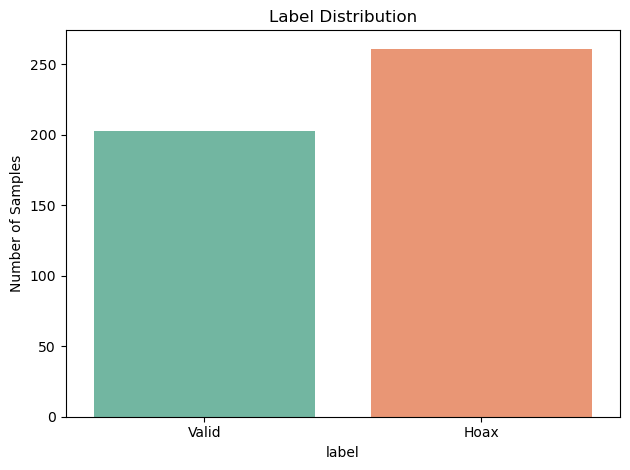

In [6]:
# ===== Label Distribution =====
label_counts = df["label"].value_counts()
print("\n🧮 Class distribution:")
print(label_counts)

sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2")
plt.xticks([0, 1], ["Valid", "Hoax"])
plt.title("Label Distribution")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()


✏️ Text length stats (in words):
count     464.000000
mean      304.114224
std       236.335427
min         7.000000
25%       200.500000
50%       259.000000
75%       361.250000
max      4047.000000
Name: text_length, dtype: float64


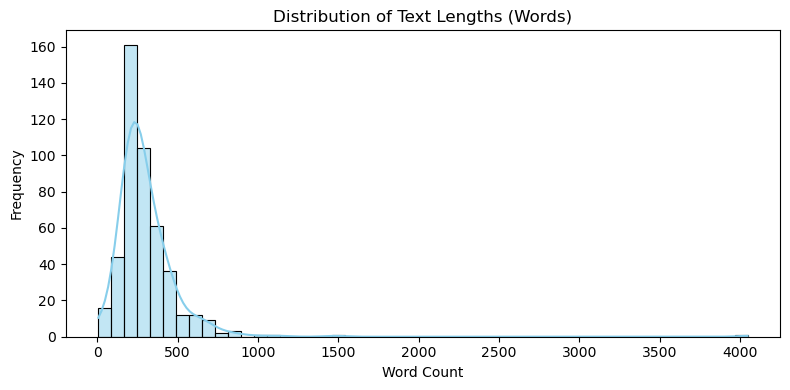

In [7]:
# ===== Text Length Analysis =====
df["text_length"] = df["cleaned"].apply(lambda x: len(str(x).split()))
print("\n✏️ Text length stats (in words):")
print(df["text_length"].describe())

plt.figure(figsize=(8, 4))
sns.histplot(df["text_length"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Text Lengths (Words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [8]:
# ===== Longest / Shortest Samples =====
print("\n🪶 Shortest example:")
print(df.loc[df["text_length"].idxmin(), "cleaned"])

print("\n📜 Longest example:")
print(df.loc[df["text_length"].idxmax(), "cleaned"])


🪶 Shortest example:
nasib pemerintahan trump usai elon musk pamitan

📜 Longest example:
konflik kontroversi dan konten kiat sukses menjadi populer ala kang dedi mulyadi konfliktampaknya menjadi atribut khas dalam sepak terjangpolitikdedi mulyadi baru baru ini terdapat video viral yang menampilkan dedi mulyadi beradu mulut dengan seorang siswi sma mengenai boleh tidaknya ada kegiatan wisuda dalam video tersebut seorang siswi sma bernama aura cinta menyampaikan aspirasinya agar prosesi wisuda tetap diadakan sebagai politisi yang memiliki citra nyablak dedi mulyadi menanggapi keinginan siswi tersebut agar tetap ada kegiatan wisuda sma dengan berkata kalau miskin jangan kebanyakan gaya selain ditujukan kepada siswi sma dedi mulyadi juga mengarahkan kritiknya kepada sejawat pemerintah lainnya yakni pemprov dki dalam pidatonya pada musyawarah nasional asosiasi dprd provinsi seluruh indonesia adpsi 2025 di bandung dedi mulyadi menyatakan bahwa dengan apbd dki jakarta yang mencapai rp 91 34 t

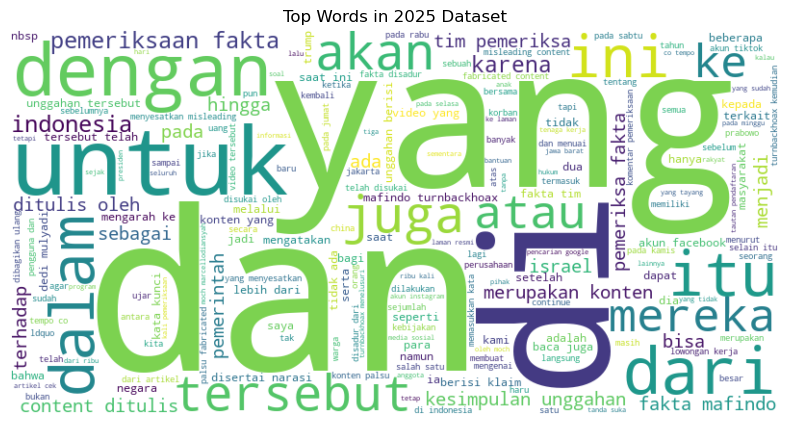

In [9]:
from wordcloud import WordCloud

all_text = " ".join(df["cleaned"].astype(str).tolist())
wc = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Top Words in 2025 Dataset")
plt.show()
